In [13]:
## Naives Bayes

In [14]:
import pandas as pd
import numpy as np


In [15]:
#Prepocessing Dataset from phase 1 and classifying it to 4 category
finald = pd.read_csv('Diabetes_dataset.csv')
finald

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,SCORE,DEPRESSION,SFHL,HFHL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,1,0,0,0,3,0,5,1,10.000,26.666667
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0,0,0,0,1,0,-2.500,3.333333
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,1,0,0,0,0,0,3,0,8.750,11.666667
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0,0,0,0,0,0,20.000,41.666667
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0,0,0,0,2,0,25.625,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0,0,0,0,0,0,3.750,5.000000
9548,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0,0,0,0,0,0,3.750,5.000000
9549,93696.0,1.0,26.0,3.0,8.50,72.000000,116.000000,112.1,182.2,33.8,...,0,0,0,0,0,0,0,0,12.500,13.333333
9550,93702.0,2.0,24.0,3.0,7.50,66.000000,118.666667,58.3,165.0,21.4,...,1,0,0,0,0,0,2,0,2.500,6.666667


In [16]:
finald = finald.dropna()

In [17]:
finald["DEPRESSION"].value_counts()

0    4396
1    1017
2     312
3     120
4      65
Name: DEPRESSION, dtype: int64

In [18]:
finald["DIABETES"].value_counts()

0.0    4423
1.0    1487
Name: DIABETES, dtype: int64

In [19]:
finald['DEPRESSION'] = np.where(finald['DEPRESSION']>0, 1.0, 0.0)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/59064362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finald['DEPRESSION'] = np.where(finald['DEPRESSION']>0, 1.0, 0.0)


In [20]:
finald["DEPRESSION"].value_counts()

0.0    4396
1.0    1514
Name: DEPRESSION, dtype: int64

In [21]:
finald["DIABETES"].value_counts()

0.0    4423
1.0    1487
Name: DIABETES, dtype: int64

In [22]:
# finald['NDPNDB'] = np.where(finald['DEPRESSION']==0.0 and finald['DIABETES']==0.0, 0.0)
finald['NDPNDB'] = np.where((finald['DEPRESSION']==0.0) & (finald['DIABETES']==0.0), 1.0, 0.0)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/2138790557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finald['NDPNDB'] = np.where((finald['DEPRESSION']==0.0) & (finald['DIABETES']==0.0), 1.0, 0.0)


In [23]:
finald["NDPNDB"].value_counts()

1.0    3375
0.0    2535
Name: NDPNDB, dtype: int64

In [24]:
finald[(finald['DEPRESSION'] == 0.0)&(finald['DIABETES'] == 0.0)].value_counts()

SEQN      GENDER  AGE   HISPANIC_O  SLEEP_HRS  DIASTOLIC  SYSTOLIC    WEIGHT  HEIGHT  BMI   DIABETES  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  SCORE  DEPRESSION  SFHL     HFHL       NDPNDB
83733.0   1.0     53.0  3.0         8.0        86.000000  140.000000  90.4    171.4   30.8  0.0       1       0       0       0       1       0       0       0       0       2      0.0          30.625  56.666667  1.0       1
92741.0   2.0     27.0  6.0         7.5        66.666667  109.333333  56.9    160.3   22.1  0.0       0       0       0       0       0       0       0       0       0       0      0.0          6.875   11.666667  1.0       1
92625.0   2.0     38.0  7.0         8.5        76.000000  116.666667  93.0    172.1   31.4  0.0       0       0       0       1       0       0       0       0       0       1      0.0          8.750   13.333333  1.0       1
92633.0   2.0     34.0  3.0         7.0        62.000000  116.666667  94.0    182.3   28.3  0.0       0  

In [25]:
finald['NDPDB'] = np.where((finald['DEPRESSION']==0.0) & (finald['DIABETES']==1.0), 1.0, 0.0)
finald['DPNDB'] = np.where((finald['DEPRESSION']==1.0) & (finald['DIABETES']==0.0), 1.0, 0.0)
finald['DPDB'] = np.where((finald['DEPRESSION']==1.0) & (finald['DIABETES']==1.0), 1.0, 0.0)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/3421744917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finald['NDPDB'] = np.where((finald['DEPRESSION']==0.0) & (finald['DIABETES']==1.0), 1.0, 0.0)
/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/3421744917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finald['DPNDB'] = np.where((finald['DEPRESSION']==1.0) & (finald['DIABETES']==0.0), 1.0, 0.0)
/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/342174

In [26]:
finald.head()

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ080,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,3,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0


In [27]:
finald["DPDB_VAL"] = ''
for col in ["NDPNDB","NDPDB", "DPNDB", "DPDB"]:
    finald.loc[finald[col] == 1.0,"DPDB_VAL"] = finald["DPDB_VAL"] + '' + col

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/2800597237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finald["DPDB_VAL"] = ''
/opt/homebrew/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
finald

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,DPNDB
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,NDPNDB
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,NDPNDB
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,NDPNDB
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,NDPDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,NDPDB
9544,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,NDPDB
9546,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,NDPNDB
9548,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,NDPNDB


In [29]:
mapping = {'NDPNDB': 0.0, 'NDPDB': 1.0, 'DPNDB': 2.0, 'DPDB': 3.0 }

finald = finald.replace({'DPDB_VAL': mapping})
finald

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
9544,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
9546,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
9548,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [30]:
finald[(finald['DEPRESSION'] == 0.0)&(finald['DIABETES'] == 1.0)]

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
5,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
6,109393.0,1.0,76.0,4.0,8.50,77.000000,186.000000,67.8,177.4,21.5,...,0,2,0.0,32.500,50.000000,0.0,1.0,0.0,0.0,1.0
7,109393.0,1.0,76.0,4.0,8.50,77.000000,186.000000,67.8,177.4,21.5,...,0,2,0.0,32.500,50.000000,0.0,1.0,0.0,0.0,1.0
14,109483.0,2.0,76.0,3.0,7.50,73.333333,125.333333,104.3,164.1,38.7,...,0,0,0.0,15.000,21.666667,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,93643.0,2.0,64.0,4.0,7.00,70.666667,178.000000,103.2,158.5,41.1,...,0,0,0.0,20.000,31.666667,0.0,1.0,0.0,0.0,1.0
9541,93685.0,1.0,53.0,1.0,6.00,55.333333,127.333333,78.7,156.9,32.0,...,0,2,0.0,37.500,58.333333,0.0,1.0,0.0,0.0,1.0
9542,93685.0,1.0,53.0,1.0,6.00,55.333333,127.333333,78.7,156.9,32.0,...,0,2,0.0,37.500,58.333333,0.0,1.0,0.0,0.0,1.0
9543,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0


In [31]:
finald[(finald['DEPRESSION'] == 1.0)&(finald['DIABETES'] == 0.0)]

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.5,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
10,109457.0,1.0,76.0,3.0,6.5,70.666667,145.666667,99.1,174.1,32.7,...,1,9,1.0,38.750,60.000000,0.0,0.0,1.0,0.0,2.0
13,109474.0,2.0,80.0,3.0,8.5,68.333333,143.000000,62.6,150.6,27.6,...,0,10,1.0,30.000,38.333333,0.0,0.0,1.0,0.0,2.0
28,109564.0,1.0,19.0,3.0,8.5,62.333333,123.000000,82.5,186.2,23.8,...,0,6,1.0,-1.250,-1.666667,0.0,0.0,1.0,0.0,2.0
32,109587.0,2.0,74.0,3.0,6.0,77.666667,145.000000,92.2,151.4,40.2,...,0,8,1.0,40.625,56.666667,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9506,93633.0,1.0,63.0,4.0,7.5,69.333333,144.666667,55.5,171.7,18.8,...,0,5,1.0,30.000,30.000000,0.0,0.0,1.0,0.0,2.0
9521,93659.0,1.0,62.0,1.0,8.0,92.000000,142.000000,67.9,164.6,25.1,...,0,7,1.0,4.375,15.000000,0.0,0.0,1.0,0.0,2.0
9523,93661.0,2.0,27.0,2.0,7.0,63.333333,109.333333,101.8,157.6,41.0,...,0,7,1.0,7.500,6.666667,0.0,0.0,1.0,0.0,2.0
9527,93664.0,1.0,39.0,1.0,5.0,94.666667,166.666667,74.9,169.6,26.0,...,0,5,1.0,3.750,3.333333,0.0,0.0,1.0,0.0,2.0


In [32]:
finald[(finald['DEPRESSION'] == 1.0)&(finald['DIABETES'] == 1.0)]

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
38,109612.0,1.0,75.0,4.0,4.5,83.000000,147.333333,93.9,177.4,29.8,...,0,11,1.0,31.25,60.000000,0.0,0.0,0.0,1.0,3.0
39,109612.0,1.0,75.0,4.0,4.5,83.000000,147.333333,93.9,177.4,29.8,...,0,11,1.0,31.25,60.000000,0.0,0.0,0.0,1.0,3.0
40,109614.0,1.0,80.0,3.0,6.0,62.666667,163.333333,94.5,180.4,29.0,...,1,14,1.0,48.75,71.666667,0.0,0.0,0.0,1.0,3.0
48,109677.0,2.0,76.0,1.0,8.0,65.666667,127.666667,91.1,157.8,36.6,...,0,16,1.0,461.50,888.000000,0.0,0.0,0.0,1.0,3.0
59,109776.0,2.0,80.0,3.0,6.5,66.333333,131.000000,64.9,148.2,29.5,...,0,8,1.0,888.00,888.000000,0.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,93567.0,2.0,64.0,2.0,8.5,77.333333,194.000000,65.5,158.0,26.2,...,0,5,1.0,28.75,21.666667,0.0,0.0,0.0,1.0,3.0
9492,93614.0,2.0,60.0,3.0,10.0,73.333333,136.000000,123.8,149.9,55.1,...,0,11,1.0,6.25,13.333333,0.0,0.0,0.0,1.0,3.0
9493,93614.0,2.0,60.0,3.0,10.0,73.333333,136.000000,123.8,149.9,55.1,...,0,11,1.0,6.25,13.333333,0.0,0.0,0.0,1.0,3.0
9503,93631.0,2.0,68.0,3.0,8.0,57.333333,144.000000,89.0,160.3,34.6,...,0,5,1.0,38.75,53.333333,0.0,0.0,0.0,1.0,3.0


In [33]:
finald["DPDB_VAL"].value_counts()

0.0    3375
2.0    1048
1.0    1021
3.0     466
Name: DPDB_VAL, dtype: int64

In [34]:
# finald['DPDB_VAL'] = np.where((finald['DPDB_VAL']==' '), np.nan, 4.0)

In [35]:
finald["DPDB_VAL"].value_counts()

0.0    3375
2.0    1048
1.0    1021
3.0     466
Name: DPDB_VAL, dtype: int64

In [36]:
# finald["DPDB_VAL"].dropna()

In [37]:
finald["DPDB_VAL"].value_counts()

0.0    3375
2.0    1048
1.0    1021
3.0     466
Name: DPDB_VAL, dtype: int64

In [38]:
finald.to_csv('dataset.csv', index=False)

In [39]:
finald

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
9544,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
9546,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
9548,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [40]:
finald.columns

Index(['SEQN', 'GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC',
       'SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'DIABETES', 'DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
       'SCORE', 'DEPRESSION', 'SFHL', 'HFHL', 'NDPNDB', 'NDPDB', 'DPNDB',
       'DPDB', 'DPDB_VAL'],
      dtype='object')

In [41]:
X = finald[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SCORE', 'SFHL', 'HFHL']]
# y = finald[['DPDB_VAL']]
# print(y,X)

In [42]:
dependentVar = 'DPDB_VAL'

y = finald[dependentVar].values

In [43]:
X = pd.get_dummies(X)
features = X.columns.tolist()
features

['GENDER',
 'AGE',
 'HISPANIC_O',
 'SLEEP_HRS',
 'DIASTOLIC',
 'SYSTOLIC',
 'WEIGHT',
 'HEIGHT',
 'BMI',
 'SCORE',
 'SFHL',
 'HFHL']

In [44]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(x_train, y_train)

GaussianNB()

In [47]:
y_pred = nbModel.predict(x_test)
# print(y_pred)
# y_pred

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[788  44   4  18]
 [198  40   0  14]
 [  7   1 179  79]
 [  4   0  32  70]]
Accuracy score: 0.7286874154262517
Precision Score :  0.6200644549151836
Recall Score :  0.6036891189206133
F1 score:  0.580227001232518


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       854
         1.0       0.47      0.16      0.24       252
         2.0       0.83      0.67      0.74       266
         3.0       0.39      0.66      0.49       106

    accuracy                           0.73      1478
   macro avg       0.62      0.60      0.58      1478
weighted avg       0.71      0.73      0.70      1478



In [50]:
nbModel.score(x_test, y_test)

0.7286874154262517

Text(69.0, 0.5, 'Truth')

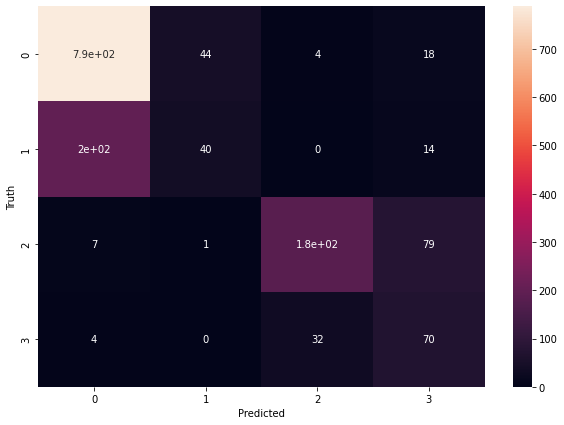

In [51]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(nbModel, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [53]:
x1 = [0,1,2,3,4,5]

<AxesSubplot:xlabel='AGE', ylabel='BMI'>

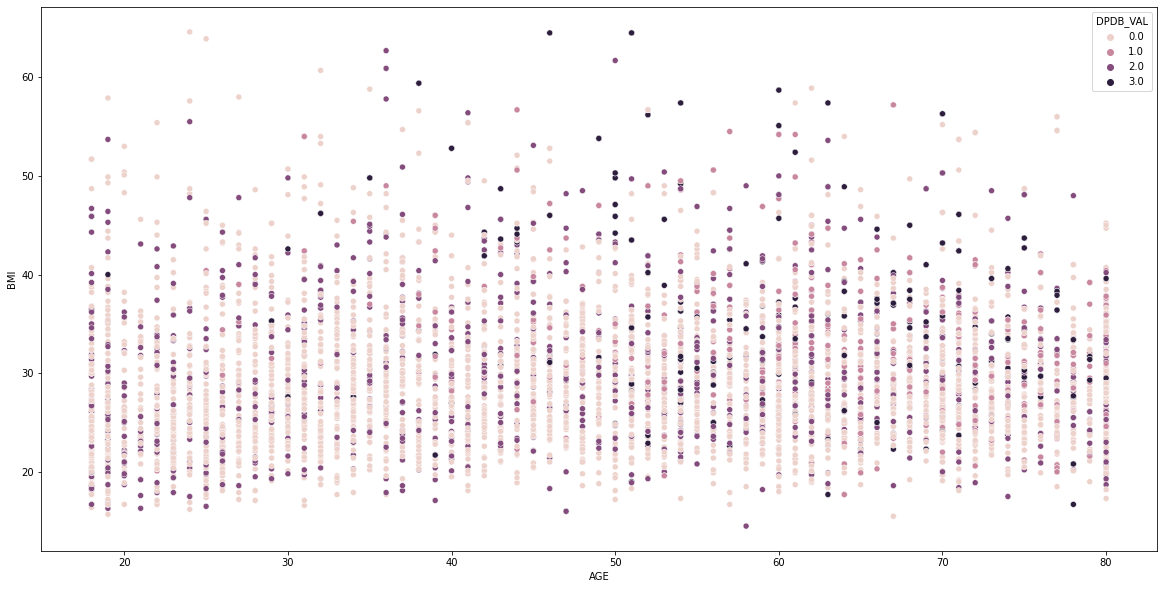

In [54]:
# plotting Age / BMI
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x="AGE", y="BMI", hue='DPDB_VAL', data=finald, ax = ax)

In [55]:
from scipy.stats import itemfreq
itemfreq(y_pred)

/var/folders/5z/nbnbggz17cd8dhmt_37gyctw0000gn/T/ipykernel_3619/2900283818.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_pred)


array([[  0., 997.],
       [  1.,  85.],
       [  2., 215.],
       [  3., 181.]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

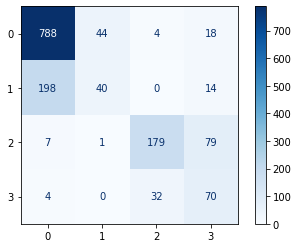

In [56]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(nbModel, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')